In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Save the clean twitter csv
Twitter_df = pd.read_csv("Data/sentiment_twitter_clean.csv")

In [4]:
Twitter_df.head()

,Index,Tweets,Label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,288,need send em accountant tomorrow oddly wasnt e...,0
3,540,add myspace myspacecomlookthunder,0
4,624,sleepy good times tonight though,0


In [5]:
#Drop NaN columns
Twitter_df = Twitter_df.dropna()

In [6]:
#vectorize it
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Twitter_df['Tweets'])
y=Twitter_df.Label

In [7]:
#setting up train and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


#X_scaler = StandardScaler(with_mean=False)




In [9]:
X_scaler = StandardScaler(with_mean=False).fit(X_train)

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.769
k: 3, Train/Test Score: 0.833/0.713
k: 5, Train/Test Score: 0.754/0.650
k: 7, Train/Test Score: 0.690/0.588
k: 9, Train/Test Score: 0.627/0.529
k: 11, Train/Test Score: 0.566/0.473
k: 13, Train/Test Score: 0.513/0.434
k: 15, Train/Test Score: 0.470/0.411
k: 17, Train/Test Score: 0.433/0.379
k: 19, Train/Test Score: 0.400/0.361


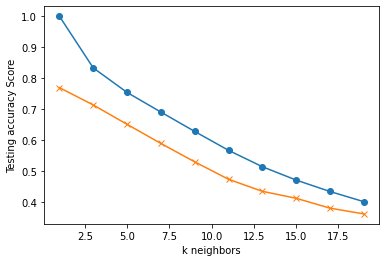

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

#plotting    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("Images/knn.png")
plt.show()

In [12]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.529


In [13]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.713


In [14]:
#GRID SEARCH

In [15]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'], 
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(
KNeighborsClassifier(),
grid_params, 
verbose = 1, 
cv = 3, 
n_jobs = -1
)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [16]:
gs_results.best_score_

0.9878112197255531

In [17]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [18]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}